![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Utilize your unsupervised learning skills to clusters in the penguins dataset!

* Import, investigate and pre-process the "penguins.csv" dataset.
* Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [2]:
# make a copy
penguins = penguins_df.copy()
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
# check for missing values 
penguins.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
# check dtypes
penguins.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

**Machine learning algorithtms need numeric data. Transform the sex columnn into a numeric column.**

In [5]:
# transform sex column into a numeric column
import numpy as np
penguins['sex'] = np.where(penguins['sex'] == 'MALE', 1, 0)
print(penguins.dtypes)
penguins.head()

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int32
dtype: object


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


**The data has different scales. The variables on a higher scale are going to have more impact on the clustering process than the lower scale variables. Consequently we need to standardize our data to deal with that.**

In [6]:
# scale the data
# Instantiate the scaler
scaler = StandardScaler()

# scale the features
penguins_scaled = scaler.fit_transform(penguins)
penguins_scaled = pd.DataFrame(penguins_scaled, columns = penguins.columns)
penguins_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


**The assumption is there are at least three species. Let's test the possible optimal number of clusters with the elbow plot.**

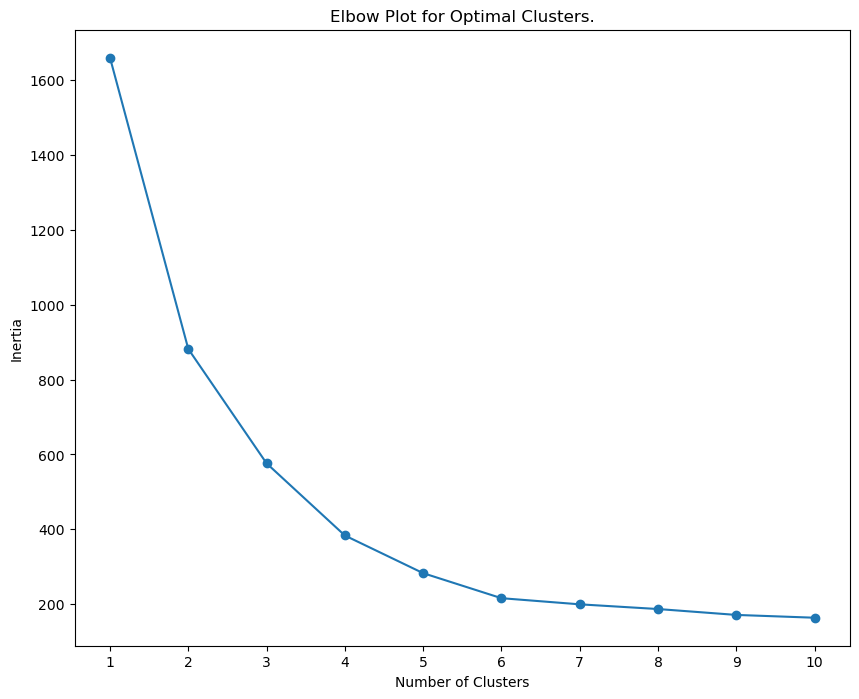

In [13]:
# mute the warnings
import warnings
warnings.filterwarnings('ignore')

# Initialize a list to hold the inertias of the different clusters
inertias = []

# state the different number of clusters
clusters = np.arange(1, 11)

# loop through
for cl in clusters:
    kmeans = KMeans(n_clusters = cl)
    kmeans.fit(penguins_scaled)
    inertias.append(kmeans.inertia_)
    
# visualize
plt.figure(figsize = (10, 8))
plt.plot(clusters, inertias, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal Clusters.')
plt.xticks(clusters)
plt.show()

**From the plot we see that as 3 might not be the best choice, the best choice might be around 4-6 clusters where the inertias really begin to decline properly.** 

In [22]:
# try 5 clusters
km_mod = KMeans(n_clusters = 5, random_state = 42)

# fit to the data
km_mod.fit(penguins_scaled)

# predict labels
labels = km_mod.predict(penguins_scaled)

In [23]:
# add the labels to the data
penguins['label'] = labels

penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
3,36.7,19.3,193.0,3450.0,0,2
4,39.3,20.6,190.0,3650.0,1,0


In [24]:
# remove the unneeded column
peng = penguins.drop('sex', axis = 'columns')
peng.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
3,36.7,19.3,193.0,3450.0,2
4,39.3,20.6,190.0,3650.0,0


In [26]:
# get the averages
stat_penguins = peng.groupby('label').mean()
print(type(stat_penguins))
stat_penguins

<class 'pandas.core.frame.DataFrame'>


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,40.315714,19.011429,192.242857,4034.642857
1,45.563793,14.237931,212.706897,4679.741379
2,39.744660,17.588350,188.864078,3410.679612
3,50.965000,19.195000,199.075000,3920.625000
4,49.473770,15.718033,221.540984,5484.836066
